## Adapted from : https://www.kaggle.com/swordey/handwritten-letter-recognition-with-a-flick

In [ ]:
#Connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')
!ls /content/gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
'My Drive'


In [ ]:
PATH = F"/content/gdrive/My Drive/models/"

In [ ]:
import numpy as np
import keras

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, BatchNormalization
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [ ]:
from numpy.random import seed
seed(1)

In [ ]:
# Image params
img_rows, img_cols = 28, 28

# Data params
letter_file = PATH+"emnist-letters-train.csv"
test_file = PATH+"emnist-letters-test.csv"
num_classes = 37
classes = 'ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt'

In [ ]:
## Prepare input data
def prep_data(raw):
    y = raw[:, 0]
    out_y = keras.utils.to_categorical(y, num_classes)

    x = raw[:, 1:]
    num_images = raw.shape[0]
    out_x = x.reshape(num_images, img_rows, img_cols, 1)
    out_x = out_x / 255
    return out_x, out_y

In [ ]:
## Convert One-Hot-Encoded values back to real values
def decode_label(binary_encoded_label):
    return np.argmax(binary_encoded_label)-1

In [ ]:
## Plot an image with it's correct value
def show_img(img,label):
    img_flip = np.transpose(img, axes=[1,0])
    plt.title('Label: ' + str(classes[decode_label(label)]))
    plt.imshow(img_flip, cmap='Greys_r')

In [ ]:
## Evaluate model with the test dataset
def eval_model(model,test_x,test_y):
    result = model.evaluate(test_x, test_y)
    print("The accuracy of the model is: ",result[1])
    return result

In [ ]:
## Plot the training history
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # "bo" is for "blue dot"
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    # b is for "solid blue line"
    plt.plot(epochs, val_loss, 'ro', label='Validation loss')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

In [ ]:
letter_data = np.loadtxt(letter_file, skiprows=1, delimiter=',')
x, y = prep_data(letter_data)

In [ ]:
print(x.shape)
print(y.shape)
print (y[1])

(88799, 28, 28, 1)
(88799, 37)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


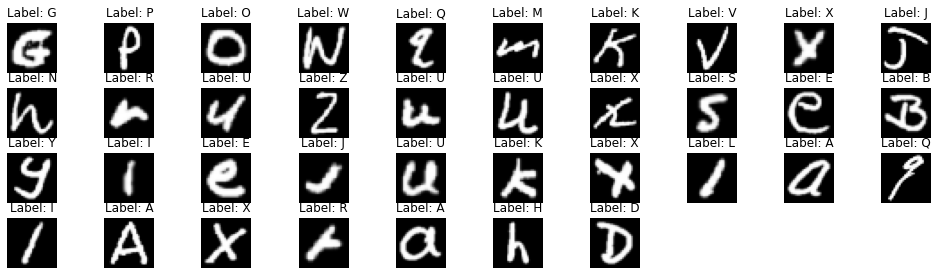

In [ ]:
fig = plt.figure(figsize=(17,4.5))
for idx in range(37):
    fig.add_subplot(4,10,idx+1)
    plt.axis('off')
    show_img(np.squeeze(x[idx]),y[idx])
plt.subplots_adjust(wspace=0.3, hspace=0.3)

In [ ]:
test_data = np.loadtxt(test_file, skiprows=1, delimiter=',')
test_x, test_y = prep_data(test_data)

In [ ]:
print(test_x.shape)
print(test_y.shape)

(14799, 28, 28, 1)
(14799, 37)


In [ ]:
# Create a more complex model
# As the architectura decision for the project
def create_complex_model(input_size,output_size):
    model = Sequential()

    model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (input_size[0], input_size[1], input_size[2])))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(64, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(128, kernel_size = 4, activation='relu'))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(output_size, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
    
    return model

In [ ]:
batch_size = 64

complex_model = create_complex_model([img_rows, img_cols,1],len(classes))
complex_history = complex_model.fit(x, y,
          batch_size = batch_size,
          epochs = 15,
          validation_split = 0.1)

In [ ]:
# plot_history(complex_history)

In [ ]:
eval_model(complex_model,test_x,test_y)


# Save Model

In [ ]:
from keras.models import model_from_json

In [ ]:
# file_path = F"/content/gdrive/My Drive/models/EMNIST_Model/"
file_path = F"/content/gdrive/My Drive/SAFE_OCR/models/EMNIST_Model/"

In [ ]:
model_json = complex_model.to_json()
config_json = str(complex_model.get_config())
with open(file_path+"model.json", "w") as json_file:
    json_file.write(model_json)
with open(file_path+"config.json","w") as json_file:
    json_file.write(config_json)
# serialize weights to HDF5
complex_model.save_weights(file_path+"model.h5")

print("Saved model to disk")